In [1]:
# Load the libraries
%pylab notebook
import numpy as np
import numpy.linalg as la
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


##### Case 1: Imagine we have 100 Procrastinating Pats on our micro-internet, each viewing a single website at a time. Each minute the Pats follow a link on their website to another site on the micro-internet. After a while, the websites that are most linked to will have more Pats visiting them, and in the long run, each minute for every Pat that leaves a website, another will enter keeping the total numbers of Pats on each website constant. The PageRank is simply the ranking of websites by how many Pats they have on them at the end of this process.


##### Case 2: We add a small probability that the Procrastinating Pats don't follow any link on a webpage, but instead visit a website on the micro-internet at random. We'll say the probability of them following a link is  d  and the probability of choosing a random website is therefore  1−d . We can use a new matrix to work out where the Pat's visit each minute.

### M = dL+((1−d)/n)J

##### where  J  is an  n×n  matrix where every element is one.

###### If  d  is one, we have the case we had previously, whereas if  d  is zero, we will always visit a random webpage and therefore all webpages will be equally likely and equally ranked. For this extension to work best,  1−d  should be somewhat small 

In [2]:
#PageRank for an arbitrarily sized internet.
# I.e. the principal eigenvector of the damped system, using the power iteration method.
# The functions inputs are the linkMatrix, and d the damping parameter
def pageRank(linkMatrix, d) :
    n = linkMatrix.shape[0]
    M = d * linkMatrix + (1-d)/n * np.ones([n, n])
    r = 100 * np.ones(n) / n # Sets up this vector (n entries of 1/n × 100 each)
    lastR = r
    r = M @ r
    i = 0
    while la.norm(lastR - r) > 0.01 :
        lastR = r
        r = M @ r
        i += 1
    print(str(i) + " iterations to convergence.")
   
    return r

In [3]:
# Use the following function to generate internets of different sizes.
def generate_internet(n) :
    c = np.full([n,n], np.arange(n))
    c = (abs(np.random.standard_cauchy([n,n])/2) > (np.abs(c - c.T) + 1)) + 0
    c = (c+1e-10) / np.sum((c+1e-10), axis=0)
    return c

In [4]:
# Test your PageRank method against the built in "eig" method.
L = generate_internet(10)

In [5]:
pageRank(L, 1)

7 iterations to convergence.


array([13.27743248,  5.31003363, 10.61709896,  7.96608211,  5.31003363,
       23.89006995, 10.61709896,  5.31003363,  7.08073262, 10.621384  ])

In [6]:
# Calculating the eigenvalues of the link matrix, L,Compare the result with pageRank function
eVals, eVecs = la.eig(L) # Gets the eigenvalues and vectors
order = np.absolute(eVals).argsort()[::-1] # Orders them by their eigenvalues
eVals = eVals[order]
eVecs = eVecs[:,order]

r = eVecs[:, 0]
100 * np.real(r / np.sum(r))

array([13.27433629,  5.30973452, 10.61946903,  7.96460177,  5.30973452,
       23.8938053 , 10.61946903,  5.30973452,  7.07964602, 10.61946903])

Populating the interactive namespace from numpy and matplotlib
36 iterations to convergence.


<IPython.core.display.Javascript object>


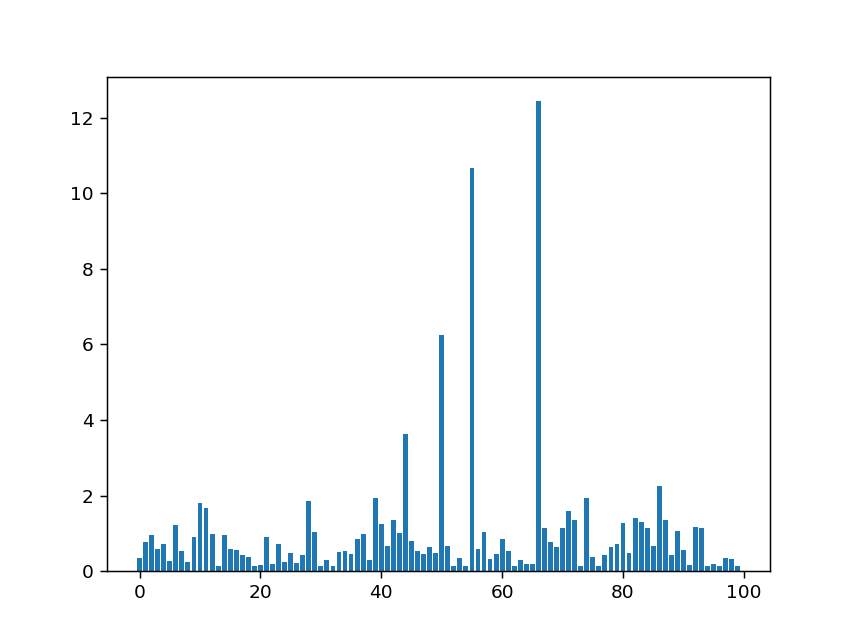

In [7]:
# View the PageRank graphically.
# This code will draw a bar chart, for each (numbered) website on the generated internet,
# The height of each bar will be the score in the PageRank.
# Run this code to see the PageRank for each internet you generate.
# - there are a few clusters of important websites, but most on the internet are rarely visited!
%pylab notebook
r = pageRank(generate_internet(100), 0.9)
plt.bar(arange(r.shape[0]), r);